In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial
from pylab import rcParams
rcParams['figure.figsize'] = 10,10

<h2>1. Introduction:</h2>

Our project was inspired by our personal experiences with the problems of persistent potholes–a hinderance that seems to cause universal frustration. According to Wilkens, there are merely "eight two-person crews that work each 10 hour shifts" when filling potholes (Wilkens, 2017). This results in an inefficient method because the process of fixing potholes is not prioritized effectively to concentrate on the areas that need it most. Consequently, the system is flawed and the priority areas can definitely be rearranged. 
 
<h4>Research Question:</h4>

People have become so desensitized to potholes that their frustration for them have become an everyday routine. For the safety of people and their cars, we asked, what approaches can be taken towards increasing the efficiency of pothole repair? And where should San Diego be allocating their pothole workers and resources? 

<h4>Hypothesis:</h4>

We predict that the following areas of concern are where the largest problems of potholes reside. These include the hindering of the bus transit system, reducing revenue earned from nearby affected parking meters, and a correlation of a slower rate a pothole is fixed with neglected areas of lower socioeconomic status in San Diego.

<h2>2. Methods:</h2>

          ****need to figure out how to smoothly incorporate the Additional Data Analysis Ya'll did last night**** 
                           (time and date it took to fill in near bus stops and populations) 
                           *new bus stop data--> can go under bus transits*
                           *new populations data--> can go under a completely new category*


<p><center>DATA SET: "GET IT DONE" (POTHOLES)</center></p>

First of all, "get it done" is a service that people report non-emergency problems to about a city such as San Diego. To begin our analyses of pothole impact, we needed to firstly clean the “Get it Done” data because it was filled with extraneous information about "get it done" reports such as graffiti locations, abandoned car locations, etc. 


     ******NOTE: the raw data set of get it done is not here so is it okay if our code cuts straight to the chase?
     Also, the open data set cleaning is not shown here

In [13]:
#upload get it done data set
df = pd.read_csv('clean_data/cleaned_get_it_done_closed_potholes.csv')

#dropping unnecessary data
df = df.drop(['address', 'sap_notification_number', 'sap_problem_code', 'service_subtype', 'source', \
            'referred_email_update', 'referral_email', 'functional_location', 'description', \
            'agency_responsible' , 'sap_problem_category', 'case_record_type', 'updated_datetime',\
            'service_request_id', 'parent_case_number'], axis = 1)

#drop all potholes 
df = df.drop(df[df.sap_problem_type != 'Pothole'].index)

#drop all NaNs for Long and Lat
df = df.dropna(subset = ['long'])
df = df.dropna(subset = ['lat'])

#drop all non-active potholes
df = df.drop(df[df.status_description == 'Duplicate'].index)
df = df.drop(df[df.status_description== 'Closed'].index)
df = df.drop(df[df.status_description=='Closed - Referred'].index)

ValueError: labels ['address' 'sap_notification_number' 'sap_problem_code' 'service_subtype'
 'source' 'referred_email_update' 'referral_email' 'functional_location'
 'description' 'agency_responsible' 'sap_problem_category'
 'case_record_type' 'updated_datetime' 'service_request_id'
 'parent_case_number'] not contained in axis

In [ ]:
#include data frame of cleaned version

After cleaning the data, we were left with the most relevant information about potholes: their latitude, longitude, and their status (open or closed) [[[what else was purposely included?]]]. We then used this data with all the following data sets, as shown below in the rest of the report. 

<p><center>DATA SET: "PARKING METERS LOCATIONS AND PARKING METERS TRANSACTIONS"</center></p>
We looked into parking meter locations around San Diego, their vicinity to potholes, and whether that affected how much they were making. We began by cleaning the data and removing irrelevant columns for both the parking meters locations and parking meters transactions:

In [ ]:
# #upload parking meters locations
# raw_trans = pd.read_csv('raw_data/treas_meters_2017_pole_by_mo_day_datasd.csv')

In [ ]:
# #upload parking meters transactions 
# clean_parking_loc = pd.read_csv('clean_data/parking_meter_location.csv')

In [ ]:
# #drop rows with zero longitude and latitudes 
# clean_parking_loc = clean_parking_loc.drop(clean_parking_loc[clean_parking_loc.longitude==0.000000].index)

# #rename pole column header of clean_parking_loc data to 'pole_id' to match the header of the clean_combined_parking_meter_data dataset
# clean_parking_loc.columns= ['index', 'pole_id', 'longitude', 'latitude']

# #drop index column
# clean_parking_loc = clean_parking_loc.drop(['index'], axis = 1)

# #merge datasets based on matching parking meter IDs
# merged_id = pd.merge(clean_parking_loc, clean_trans, on='pole_id')

In [ ]:
#cleaned out combined data frame
#combined_loc_trans_meters = pd.read_csv('clean_data/merged_parking_meters.csv')
#combined_loc_trans_meters

After cleaning the data set, we were left to work with the latitude, longitude, and pole identifications of the parking meters. The parking meter transactions were added up based on pole ID to find the total revenue that pothole made and then combined with the parking meter location data to find exactly where each pole was located.  

In [ ]:
# #sum of transaction amount based on pole_id
# raw_trans['combined_parking_meter_data'] = raw_trans.groupby(['pole_id'])['sum_trans_amt'].transform('sum')

# #drop columns 'meter_type', 'month', 'day', 'num_trans'
# clean_trans = raw_trans.drop(['meter_type', 'month', 'day', 'num_trans'],axis = 1)

# #eliminated duplicate sum value for each pole_id
# clean_trans = clean_trans.drop_duplicates(subset=['pole_id'], keep='first')

# #merge datasets based on matching parking meter IDs
# merged_id = pd.merge(clean_parking_loc, clean_trans, on='pole_id')

                                                        ---

Firstly, we compared the distribution of the distances of the parking meters to the closest pothole to random points around San Diego to the closest pothole. We were able to generate these random points by using the CA shapefile with QGIS, creating 60000 random points.

In [ ]:
#graphing (and code???) of both random points + min distance to parking meters?

The QGIS process is pictured as follows:

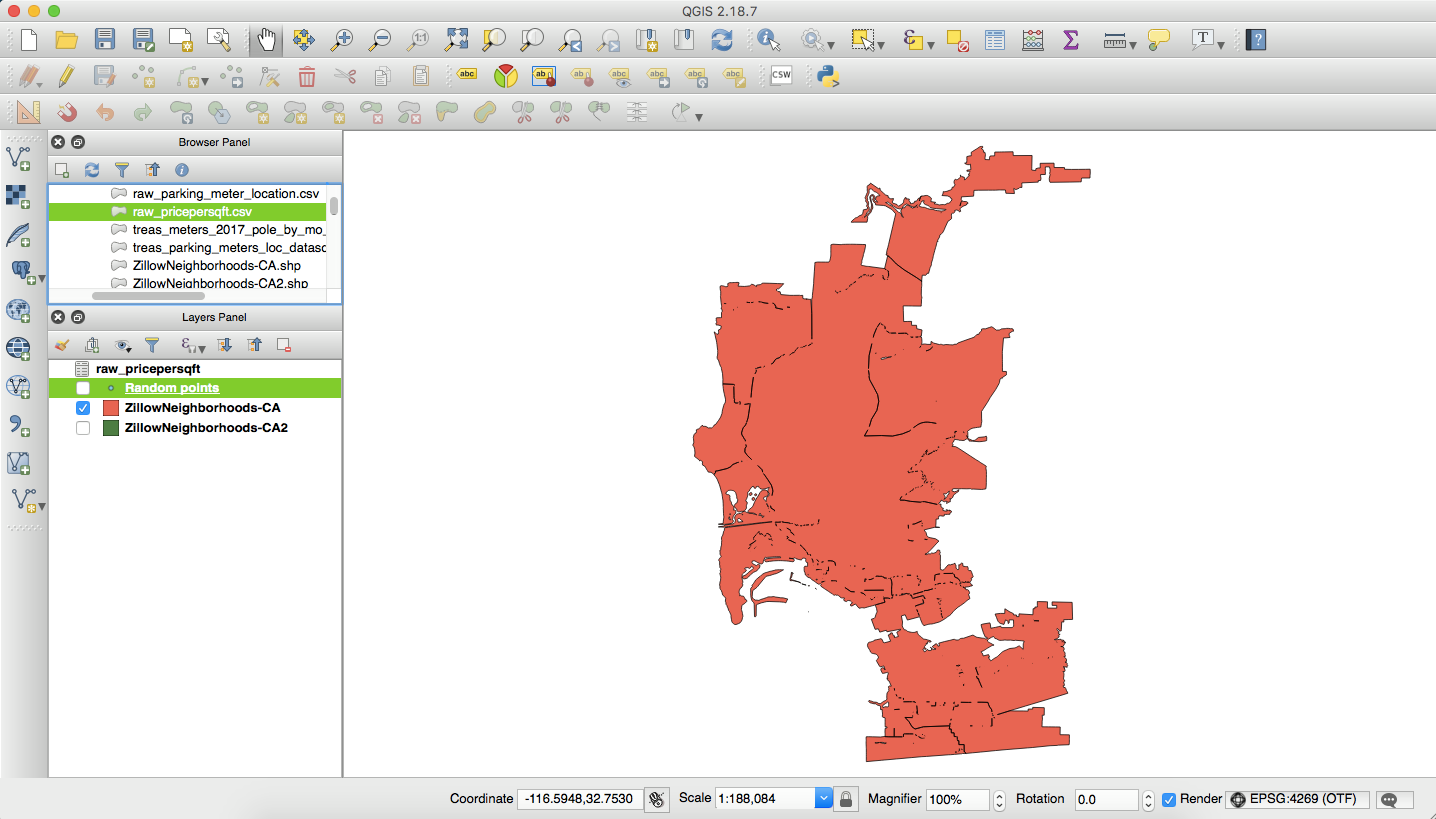

In [3]:
Image("plots/QGis1.png")

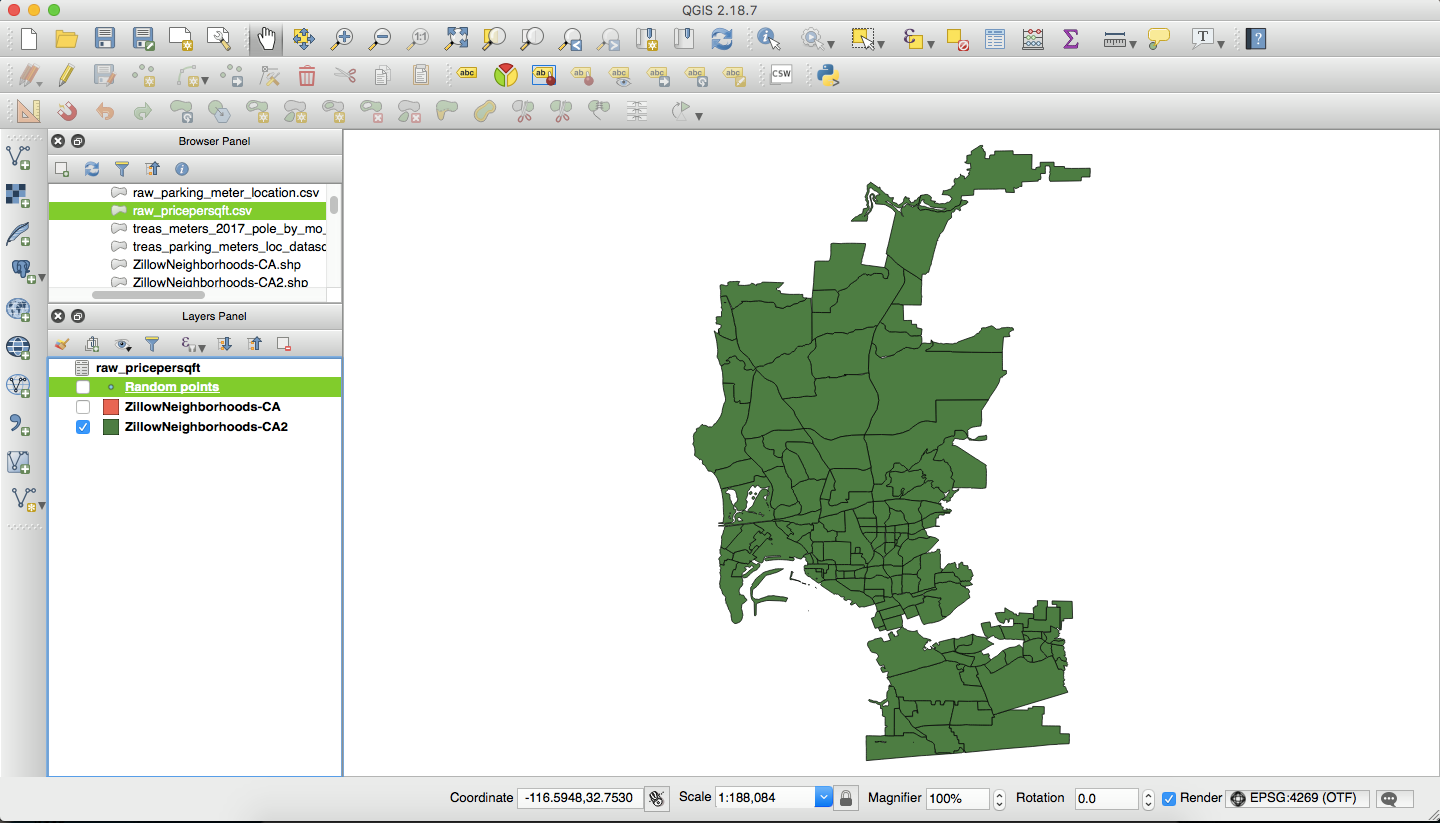

In [4]:
Image("plots/QGis2.png")

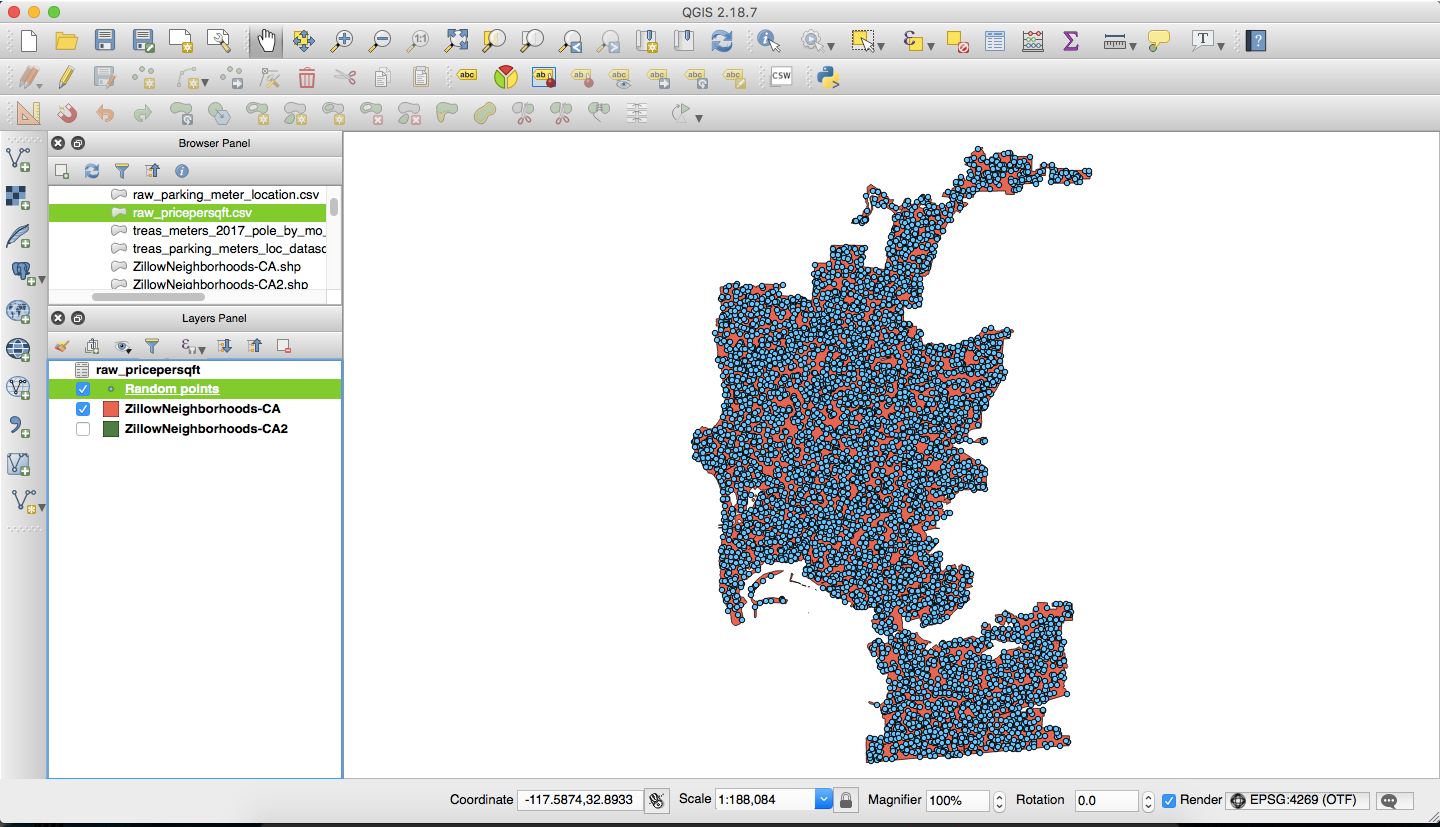

In [5]:
Image("plots/QGis3.png")

We found that these graphs did not show any evidence of significant data, especially because there is evidently a large concentration of parking meters in one area, as seen in the graph above. It is therefore futile to compare this distribution with the random points in the city because it would evidently be skewed by the uneven spacing of parking meters throughout San Diego. (mention averages or is that irrelevant?)

In [1]:
#insert averages of both?

                                                        ---

To ensure we did not need further analysis, we wanted to visualize and see where the parking meters were located using Arc GIS:

In [ ]:
#TIM'S GIS GRAPH

As a result of this visualization, we concluded that it was not wise to further analyze this data because most of the parking meters listed from this set is concentrated in specific areas mainly in the downtown region, as seen above.

                                         DATA SET: "TRANSIT STOPS LOCATIONS" 

We followed a similar procedure to that of the parking meters for analyzing the bus stop locations. We started by cleaning the data set:

In [ ]:
# #upload bus stops
# bus_stops= pd.read_csv('/raw_data/CITY.TRANSIT_STOPS_GTFS_datasd.csv')

# #dropping irrelevant columns 
# clean_bus_stops = bus_stops[['LONGITUDE', 'LATITUDE']]

In [ ]:
##cleaned out data frame 
#clean_bus_stops

We were left with just the latitude and longitude of the bus stops, which we would again then compare the distances to the potholes with the random points obtained from earlier:

In [ ]:
#insert graphs (and code???) of random points + min distance to bus stops 

From both distribution graphs, we were able to conclude that there was actually a significant result. As seen by the averages below, the averages of the minimum distance of potholes to the bus stops compared with the random points is much smaller. This indicates that the results are not just by chance; there are more potholes allocated near bus stop locations.  

In [ ]:
#insert averages

                                                        ---


We took additional steps to further analyze this data set in relevance to potholes. In order to investigate 

                                  DATA SET: "Neighborhood_MedianValuePerSqft_AllHomes" 

We then used Zillow’s price per square foot data to determine the socioeconomic effect of potholes. We first cleaned data to only use the locations based in San Diego. 

In [ ]:
# #upload zillow data
# zillowpd = pd.read_csv('/raw_data/Neighborhood_MedianValuePerSqft_AllHomes.csv') 

# #remove all counties not san diego
# zillowpdsd = zillowpd[zillowpd['CountyName'] == 'San Diego'] 
# #remove uneccessary columns
# zillowpdsd = zillowpdsd.drop('RegionID', 1)
# zillowpdsd = zillowpdsd.drop('State', 1)
# zillowpdsd = zillowpdsd.drop('SizeRank', 1)
# #remove all but latest rent info
# zillowpdsd2 = zillowpdsd[['RegionName', 'City','Metro','CountyName','2017-03']]


In [ ]:
#cleaned out combined data frame
#clean_zillow= pd.read_csv('/raw_data/clean_latest_pricepersqft.csv')
#clean_zillow

We found that the Zillow data only contained neighborhoods, thus we were not able to directly map the price/sqft with the potholes. So, we used geocoder with the pothole data to determine the neighborhoods of each pothole, which we could then map to the Zillow prices. Since geocoder limits the amount of data that can be run with it, we needed to run it in chunks and then combined all the neighborhoods f
or the open potholes as well as all the neighborhoods for the closed potholes.

In [ ]:
#include combined open pothole data and closed pothole dataframe?

Yet, we found that some names did not match between the pothole neighborhoods and the zillow neighborhoods, so we discovered that we needed to use Bing API-which Zillow uses for its neighborhoods-to fill in the missing gaps:

In [ ]:
#insert some bing api?????

In [ ]:
# insert code combining bing and API?????????

In [ ]:
#include data frame of cleaned version?

Afterwards, in order to see whether or not there exist a relation between the density of potholes in a neighborhood and the neighborhood's real estate data, we decided to plot these factors on a scatter plot and see if some correlation exists. Since our prediction was that neighborhood "value" would affect pothole count, we set the Neighborhood Zillow data as the independent variable and the pothole count as the dependent variable. The scatter plot is as follows:

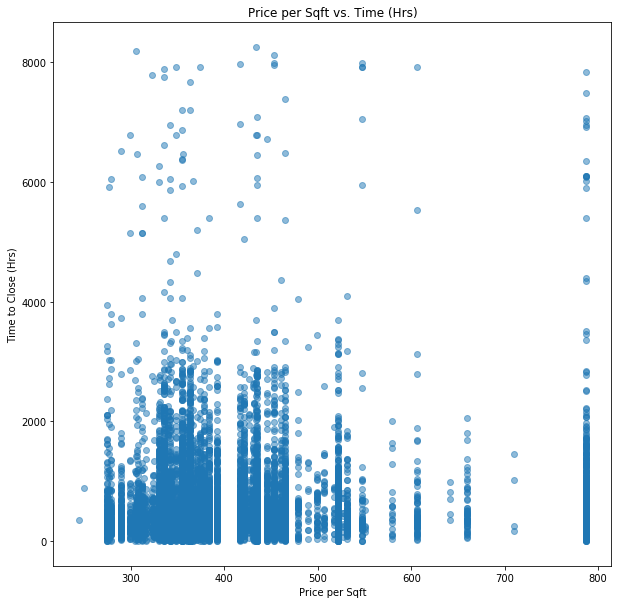

In [6]:
Image("plots/18944729_10211508935911672_426264008_n.png")

We decided to test the correlation using the pearson-r method from numpy. The results are as below:

In [ ]:
non_zero_df= pd.read_csv('clean_data/non_zero_price_closed.csv')

#logged pearson r
sp.pearsonr(np.log(non_zero_df['Neighborhood Prices']), np.log(non_zero_df['Duration to Close (Hrs)']))

#unlogged pearson r
sp.pearsonr(non_zero_df['Neighborhood Prices'], non_zero_df['Duration to Close (Hrs)'])

sp.spearmanr(non_zero_df['Neighborhood Prices'], non_zero_df['Duration to Close (Hrs)'])
    


Because of the major difference between the log and unlogged data, we decided to use the spearman test instead; we realized that there is no significance with the data values, and concluded that a neighborhood's real estate prices does not affect the number of potholes in neighborhood in San Diego.
 

    3. Conclusion/ Discussion

*need general results but does not need to be fleshed out for tomorrow

    4. Resources


John Wilkens 2017: http://www.sandiegouniontribune.com/news/transportation/sd-me-pothole-repair-20170208-story.html 